In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")



In [3]:
x_train.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [4]:
x_test.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [5]:
# Separate features and target variable
x = x_train.drop("target", axis=1)
y = x_train["target"]


In [6]:
# Milestone 1 Q1: Number of unique OS versions
unique_os_versions = x_train['OSVersion'].nunique()
print("Unique OS Versions:", unique_os_versions)

Unique OS Versions: 7


In [7]:
# Milestone 1 Q2: Maximum value of NumAntivirusProductsInstalled
max_antivirus_installed = x_train['NumAntivirusProductsInstalled'].max()
print("Max NumAntivirusProductsInstalled:", max_antivirus_installed)

Max NumAntivirusProductsInstalled: 5.0


In [8]:
# Milestone 1 Q3: Systems owned by gamers where malware was detected
gamer_malware_count = x_train[(x_train['IsGamer'] == 1) & (x_train['target'] == 1)].shape[0]
print("Gamer systems with malware detected:", gamer_malware_count)

Gamer systems with malware detected: 16294


In [9]:
# Milestone 1 Q4: Most frequent RealTimeProtectionState when IsPassiveModeEnabled == 1
most_frequent_rtp = x_train[x_train['IsPassiveModeEnabled'] == 1]['RealTimeProtectionState'].mode()[0]
print("Most frequent RealTimeProtectionState when IsPassiveModeEnabled == 1:", most_frequent_rtp)


Most frequent RealTimeProtectionState when IsPassiveModeEnabled == 1: 0.0


In [10]:
# Milestone 1 Q5: Count of systems with resolution 1366x768
resolution_count = x_train[(x_train['PrimaryDisplayResolutionHorizontal'] == 1366) &
                           (x_train['PrimaryDisplayResolutionVertical'] == 768)].shape[0]
print("Systems with 1366x768 resolution:", resolution_count)


Systems with 1366x768 resolution: 51435


In [11]:
# Milestone 1 Q6: 50th percentile of TotalPhysicalRAMMB
ram_50th_percentile = x_train['TotalPhysicalRAMMB'].median()
print("50th percentile of TotalPhysicalRAMMB:", ram_50th_percentile)


50th percentile of TotalPhysicalRAMMB: 4096.0


In [12]:
# Milestone 1 Q 7: Exploratory Data Analysis (EDA)
print("Dataset Overview:\n", x_train.describe())


Dataset Overview:
        IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53

In [13]:
# Missing values
missing_values = x_train.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])


Missing values:
 SMode                                 981
CityID                                623
RegionIdentifier                      559
IsGamer                               559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
PrimaryDiskCapacityMB                 110
SystemVolumeCapacityMB                110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorModelID                       85
ProcessorCoreCount                     85
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled          76
AntivirusConfigID

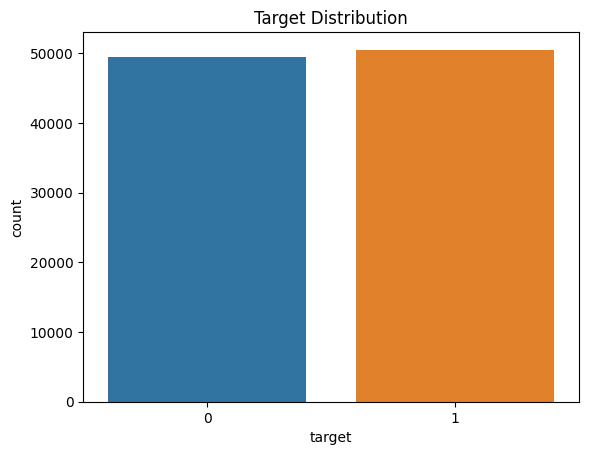

In [14]:
# Target distribution
sns.countplot(x=x_train['target'])
plt.title("Target Distribution")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


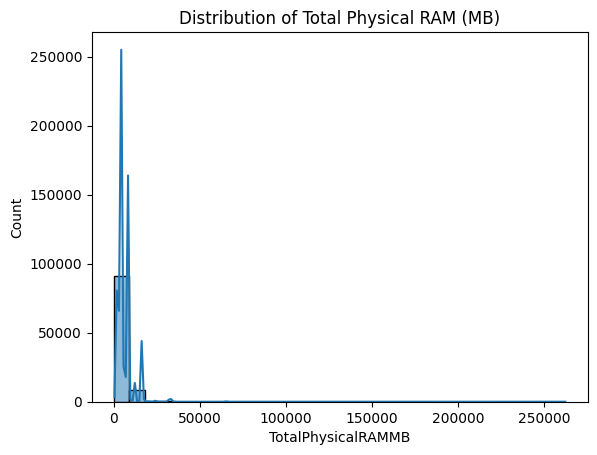

In [15]:
# Distribution of TotalPhysicalRAMMB
sns.histplot(x_train['TotalPhysicalRAMMB'].dropna(), bins=30, kde=True)
plt.title("Distribution of Total Physical RAM (MB)")
plt.show()


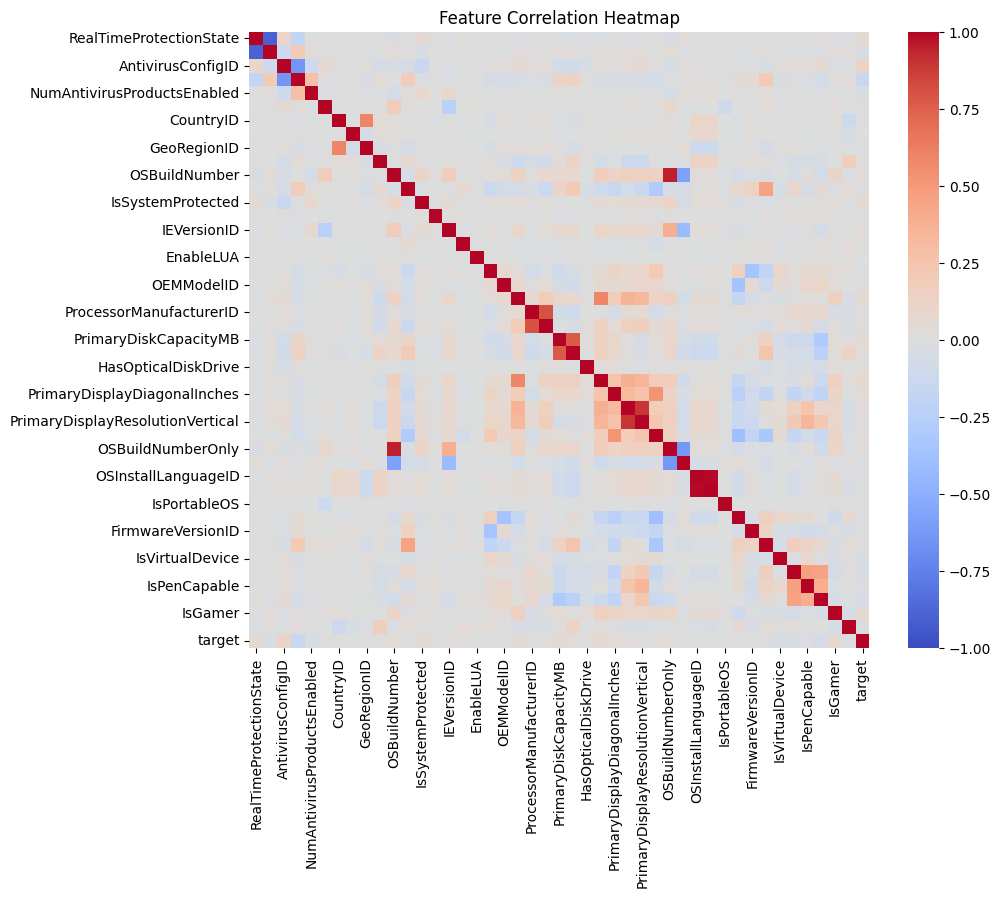

In [16]:
# Select only numeric columns
numeric_features = x_train.select_dtypes(include=['number'])

# Drop columns with only NaN values or constant values
numeric_features = numeric_features.loc[:, numeric_features.nunique() > 1].dropna(axis=1, how='all')

# Compute correlation
corr_matrix = numeric_features.corr()

# Replace NaN values with 0 (optional)
corr_matrix = corr_matrix.fillna(0)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Combine train and test for preprocessing (excluding 'MachineID')
combined_data = pd.concat([x.drop('MachineID',axis=1), x_test.drop('MachineID',axis=1)], ignore_index=True)

In [18]:
# Preprocessing: Handle categorical and numerical features separately
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

#Handle Missing Values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

combined_data[numerical_cols] = numerical_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])


In [19]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Scale numerical features
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])


In [20]:
# Separate train and test sets
x_train_processed = combined_data[:x_train.shape[0]]
x_test_processed = combined_data[x_train.shape[0]:]

In [21]:
# Train the model Accuracy=0.61750
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(x_train_processed, y)
# y_pred = model.predict(x_test_processed)



In [22]:
# Train the model Accuracy=0.54770

# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# model.fit(x_train_processed, y)
# y_pred = model.predict(x_test_processed)

In [23]:
# Train the model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train_processed, y)
# Make predictions
y_pred = model.predict(x_test_processed)

In [24]:

# Create submission file with simple integer IDs
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [25]:
# Milestone 2 Q1

# Check for low variance in categorical columns
redundant_columns = ['IsBetaUser', 'IsPassiveModeEnabled', 'AntivirusConfigID', 
                     'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']

for col in redundant_columns:
    print(f"{col} unique value counts:\n", x[col].value_counts(normalize=True), "\n")


IsBetaUser unique value counts:
 IsBetaUser
0    1.0
Name: proportion, dtype: float64 

IsPassiveModeEnabled unique value counts:
 IsPassiveModeEnabled
0    0.98238
1    0.01762
Name: proportion, dtype: float64 

AntivirusConfigID unique value counts:
 AntivirusConfigID
53447.0    0.666897
7945.0     0.054411
47238.0    0.039890
62773.0    0.025639
46413.0    0.013720
             ...   
52678.0    0.000010
6793.0     0.000010
54599.0    0.000010
17943.0    0.000010
32922.0    0.000010
Name: proportion, Length: 1976, dtype: float64 

AutoSampleSubmissionEnabled unique value counts:
 AutoSampleSubmissionEnabled
0    1.0
Name: proportion, dtype: float64 

IsFlightsDisabled unique value counts:
 IsFlightsDisabled
0.0    1.0
Name: proportion, dtype: float64 



In [26]:
# Milestone 2 Q2

import numpy as np

# Convert categorical columns to numerical if needed
x_numeric = x.copy()
categorical_cols = x_numeric.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in categorical_cols:
    x_numeric[col] = label_enc.fit_transform(x_numeric[col])

# Compute Pearson correlation
correlation_matrix = x_numeric.corr()

# Define column pairs to check correlation
column_pairs = [
    ("DateAS", "SignatureVersion"),
    ("OSBuildLab", "NumericOSVersion"),
    ("OSEdition", "OSSkuFriendlyName"),
    ("OSProductSuite", "OSSkuFriendlyName")
]

# Display correlation values
for col1, col2 in column_pairs:
    if col1 in correlation_matrix.columns and col2 in correlation_matrix.columns:
        correlation_value = correlation_matrix.loc[col1, col2]
        print(f"Correlation between {col1} and {col2}: {correlation_value:.4f}")
    else:
        print(f"Columns {col1} and/or {col2} not found in correlation matrix.")


Correlation between DateAS and SignatureVersion: 0.8745
Correlation between OSBuildLab and NumericOSVersion: 0.7866
Correlation between OSEdition and OSSkuFriendlyName: 0.9989
Correlation between OSProductSuite and OSSkuFriendlyName: -0.9601


In [27]:
# Milestone 2 Q3

from sklearn.preprocessing import OneHotEncoder

# Extract object columns
cat_df = x.select_dtypes(include=['object'])

# Identify categorical columns with ≤10 unique values
low_cardinality_cols = [col for col in cat_df.columns if cat_df[col].nunique() <= 10]

# Apply OneHotEncoding
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
encoded_df = encoder.fit_transform(cat_df[low_cardinality_cols])

# Update cat_df with encoded columns
cat_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Check new number of columns
print("New number of columns in cat_df:", cat_df.shape[1])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


New number of columns in cat_df: 69


In [28]:
# Milestone 2 Q4

from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
num_df = x.select_dtypes(include=['int64', 'float64'])

# Handle missing values by filling with 0 or column median
num_df = num_df.fillna(num_df.median())

# Apply MinMaxScaler
scaler = MinMaxScaler()
num_df_scaled = scaler.fit_transform(num_df)

# Sum of all values
sum_num_df = np.sum(num_df_scaled)
print("Sum of all values in num_df:", sum_num_df)



Sum of all values in num_df: 1536370.453366877


In [29]:
# Milestone 2 Q5

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fill missing values with most frequent strategy
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Encode categorical features
encoder = OrdinalEncoder()
cat_cols = X_imputed.select_dtypes(include=['object']).columns
X_imputed[cat_cols] = encoder.fit_transform(X_imputed[cat_cols])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train SGDClassifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SGDClassifier Accuracy:", accuracy)



SGDClassifier Accuracy: 0.4951


In [30]:
#Milestone 3

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Separate features and target variable
x = x_train.drop(["MachineID", "target"], axis=1)
y = x_train["target"]

# Combine train and test for preprocessing
combined_data = pd.concat([x, x_test.drop("MachineID", axis=1)], ignore_index=True)

# Identify categorical and numerical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Handle Missing Values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = numerical_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Scale numerical features
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate train and test sets
x_train_processed = combined_data[:x_train.shape[0]]
x_test_processed = combined_data[x_train.shape[0]:]

# Split train data
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_processed, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree with Grid Search
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring='accuracy', cv=3)
grid_search_dt.fit(x_train_split, y_train_split)

# Best parameters and accuracy for Decision Tree
best_dt = grid_search_dt.best_estimator_
best_max_depth = grid_search_dt.best_params_['max_depth']
best_min_samples_split = grid_search_dt.best_params_['min_samples_split']
best_min_samples_leaf = grid_search_dt.best_params_['min_samples_leaf']

y_val_pred_dt = best_dt.predict(x_val_split)
accuracy_dt = accuracy_score(y_val_split, y_val_pred_dt)

print("Decision Tree Results:")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Validation Accuracy: {accuracy_dt:.2f}")

# Model 2: AdaBoost with Grid Search
ada = AdaBoostClassifier(random_state=42)
param_grid_ada = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [5, 10],
    'algorithm': ['SAMME']
}
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, scoring='accuracy', cv=3)
grid_search_ada.fit(x_train_split, y_train_split)

# Best parameters and accuracy for AdaBoost
best_ada = grid_search_ada.best_estimator_
best_n_estimators = grid_search_ada.best_params_['n_estimators']
best_learning_rate = grid_search_ada.best_params_['learning_rate']

y_val_pred_ada = best_ada.predict(x_val_split)
accuracy_ada = accuracy_score(y_val_split, y_val_pred_ada)

print("\nAdaBoost Results:")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best learning_rate: {best_learning_rate}")
print(f"Validation Accuracy: {accuracy_ada:.2f}")


Decision Tree Results:
Best max_depth: 20
Best min_samples_split: 2
Best min_samples_leaf: 2
Validation Accuracy: 0.57

AdaBoost Results:
Best n_estimators: 10
Best learning_rate: 5
Validation Accuracy: 0.43


# 03-March-2025 submission

**XGBoost**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier  # Using XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score  # Added ROC AUC

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier  # Using XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score  # Added ROC AUC

# Load the dataset
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
# Separate features and target variable
X = x_train.drop("target", axis=1)
y = x_train["target"]

# Combine train and test for preprocessing (excluding 'MachineID')
combined_data = pd.concat([X.drop('MachineID',axis=1), x_test.drop('MachineID',axis=1)], ignore_index=True)

# Preprocessing: Handle missing values and encode categoricals
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = numerical_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])


# Scale numerical features – Consider tree-based scaling alternatives
scaler = StandardScaler() # OR RobustScaler() OR QuantileTransformer(output_distribution='normal')
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate train and test sets
X_train_processed = combined_data[:X.shape[0]]
X_test_processed = combined_data[X.shape[0]:]

# Train the XGBoost model with optimized parameters
model = XGBClassifier(
    n_estimators=1000,  # Increased number of trees
    learning_rate=0.05,  # Reduced learning rate
    max_depth=7,        # Limited tree depth
    subsample=0.8,      # Introduce stochasticity
    colsample_bytree=0.8,# Feature subsampling
    objective='binary:logistic', # Correct objective for binary classification
    n_jobs=-1,          # Use all available cores
    random_state=42,      # Set random state for reproducibility
    early_stopping_rounds=20 # Early stopping to prevent overfitting
    ) 

# Train the model with early stopping
eval_set = [(X_train_processed, y)]
model.fit(X_train_processed, y, eval_set=eval_set, eval_metric="auc", verbose=100)

# Make predictions
y_pred_prob = model.predict_proba(X_test_processed)[:, 1] # Predict probabilities

# threshold = 0.5
threshold = 0.54
y_pred = (y_pred_prob > threshold).astype(int)  # Convert to 0 or 1

# Create submission file
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred}) # Use y_pred, not y_pred_prob
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


# Evaluate on training set (for demonstration - remember to use cross-validation for robust evaluation)
y_train_pred_prob = model.predict_proba(X_train_processed)[:, 1]
train_auc = roc_auc_score(y, y_train_pred_prob)
print(f"Training ROC AUC: {train_auc}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64983
[100]	validation_0-auc:0.72688
[200]	validation_0-auc:0.76182
[300]	validation_0-auc:0.78870
[400]	validation_0-auc:0.81179
[500]	validation_0-auc:0.83321
[600]	validation_0-auc:0.85261
[700]	validation_0-auc:0.86934
[800]	validation_0-auc:0.88403
[900]	validation_0-auc:0.89727
[999]	validation_0-auc:0.90803
Submission file created successfully!
Training ROC AUC: 0.9080256682299225


In [33]:
# Load the dataset
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")


In [34]:
# Separate features and target variable
X = x_train.drop("target", axis=1)
y = x_train["target"]

In [35]:
# Combine train and test for preprocessing (excluding 'MachineID')
combined_data = pd.concat([X.drop('MachineID',axis=1), x_test.drop('MachineID',axis=1)], ignore_index=True)

# Preprocessing: Handle missing values and encode categoricals
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = numerical_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

In [36]:
# Scale numerical features – Consider tree-based scaling alternatives
scaler = StandardScaler() # OR RobustScaler() OR QuantileTransformer(output_distribution='normal')
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])


In [37]:
# Separate train and test sets
X_train_processed = combined_data[:X.shape[0]]
X_test_processed = combined_data[X.shape[0]:]

In [38]:
# Train the XGBoost model with optimized parameters
model = XGBClassifier(
    n_estimators=1000,  # Increased number of trees
    learning_rate=0.05,  # Reduced learning rate
    max_depth=7,        # Limited tree depth
    subsample=0.8,      # Introduce stochasticity
    colsample_bytree=0.8,# Feature subsampling
    objective='binary:logistic', # Correct objective for binary classification
    n_jobs=-1,          # Use all available cores
    random_state=42,      # Set random state for reproducibility
    early_stopping_rounds=20 # Early stopping to prevent overfitting
    ) 

In [39]:
# Train the model with early stopping
eval_set = [(X_train_processed, y)]
model.fit(X_train_processed, y, eval_set=eval_set, eval_metric="auc", verbose=100)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64983
[100]	validation_0-auc:0.72688
[200]	validation_0-auc:0.76182
[300]	validation_0-auc:0.78870
[400]	validation_0-auc:0.81179
[500]	validation_0-auc:0.83321
[600]	validation_0-auc:0.85261
[700]	validation_0-auc:0.86934
[800]	validation_0-auc:0.88403
[900]	validation_0-auc:0.89727
[999]	validation_0-auc:0.90803


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
# Make predictions
y_pred_prob = model.predict_proba(X_test_processed)[:, 1] # Predict probabilities

# threshold = 0.5
threshold = 0.54
y_pred = (y_pred_prob > threshold).astype(int)  # Convert to 0 or 1

In [41]:
# Create submission file
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred}) # Use y_pred, not y_pred_prob
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [42]:
# Evaluate on training set (for demonstration - remember to use cross-validation for robust evaluation)
y_train_pred_prob = model.predict_proba(X_train_processed)[:, 1]
train_auc = roc_auc_score(y, y_train_pred_prob)
print(f"Training ROC AUC: {train_auc}")

Training ROC AUC: 0.9080256682299225


**XGBoost-2**

In [43]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer
# from sklearn.impute import SimpleImputer
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
# from sklearn.utils.class_weight import compute_sample_weight
# import optuna

# # Load Data
# x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# # Separate Features & Target
# X = x_train.drop(["target", "MachineID"], axis=1)
# y = x_train["target"]
# X_test = x_test.drop("MachineID", axis=1)

# # Combine Train & Test for Preprocessing
# combined_data = pd.concat([X, X_test], ignore_index=True)

# # Identify Categorical & Numerical Columns
# categorical_cols = combined_data.select_dtypes(include=['object']).columns
# numerical_cols = combined_data.select_dtypes(include=['number']).columns

# # Handle Missing Values
# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')

# combined_data[numerical_cols] = num_imputer.fit_transform(combined_data[numerical_cols])
# combined_data[categorical_cols] = cat_imputer.fit_transform(combined_data[categorical_cols])

# # Encode Categorical Features
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     combined_data[col] = label_encoder.fit_transform(combined_data[col])

# # Scale Numerical Features (Tree-based Friendly)
# scaler = QuantileTransformer(output_distribution='normal')
# combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# # Feature Engineering: Add Interaction Features
# for col in numerical_cols:
#     combined_data[f'{col}_squared'] = combined_data[col] ** 2  # Squared Feature

# # Separate Processed Train & Test Data
# X_train_processed = combined_data[:X.shape[0]]
# X_test_processed = combined_data[X.shape[0]:]

# # Handle Class Imbalance
# class_weight = compute_sample_weight(class_weight="balanced", y=y)
# scale_pos_weight = class_weight.mean()

# # Define Optuna Hyperparameter Tuning
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 500, 2000, step=100),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 4, 12),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
#         'scale_pos_weight': scale_pos_weight
#     }
    
#     model = XGBClassifier(**params, objective='binary:logistic', random_state=42, n_jobs=-1)
#     model.fit(X_train_processed, y, eval_set=[(X_train_processed, y)], eval_metric="auc", early_stopping_rounds=20, verbose=False)
    
#     y_pred = model.predict(X_train_processed)
#     return accuracy_score(y, y_pred)

# # Run Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)
# best_params = study.best_params

# # Train Optimized Model
# model = XGBClassifier(**best_params, objective='binary:logistic', random_state=42, n_jobs=-1)
# model.fit(X_train_processed, y, eval_set=[(X_train_processed, y)], eval_metric="auc", early_stopping_rounds=20, verbose=100)

# # Feature Importance Plot
# feature_importance = model.feature_importances_
# feature_names = X_train_processed.columns
# sorted_idx = np.argsort(feature_importance)[-20:]

# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
# plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
# plt.xlabel("Feature Importance")
# plt.title("Top 20 Feature Importances")
# plt.show()

# # Make Predictions
# y_pred_prob = model.predict_proba(X_test_processed)[:, 1]

# # Find Best Threshold Using F1 Score
# best_threshold = 0.5
# best_f1 = 0
# y_train_pred_prob = model.predict_proba(X_train_processed)[:, 1]

# for t in np.arange(0.3, 0.7, 0.01):
#     preds = (y_train_pred_prob > t).astype(int)
#     score = f1_score(y, preds)
#     if score > best_f1:
#         best_f1 = score
#         best_threshold = t

# print(f"Best Threshold: {best_threshold}")

# # Apply Optimized Threshold
# y_pred = (y_pred_prob > best_threshold).astype(int)

# # Create Submission File
# submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
# submission.to_csv('submission.csv', index=False)

# print("Submission file created successfully!")

# # Evaluate on Training Set
# train_auc = roc_auc_score(y, y_train_pred_prob)
# train_accuracy = accuracy_score(y, (y_train_pred_prob > best_threshold).astype(int))

# print(f"Training ROC AUC: {train_auc}")
# print(f"Training Accuracy: {train_accuracy}")


In [44]:
#model1-0.63650
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import pickle
import regex as re
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Load Data
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Separate features and target variable
X = x_train.drop(["target", "MachineID"], axis=1)
y = x_train["target"]
X_test = x_test.drop("MachineID", axis=1)

# Combine for preprocessing
combined_data = pd.concat([X, X_test], ignore_index=True)

# Identify categorical and numerical features
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = num_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = cat_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Scale numerical features
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate processed train & test data
X_train_processed = combined_data[:len(X)]
X_test_processed = combined_data[len(X):]

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_resampled = smote.fit_resample(X_train_processed, y)

# Train LightGBM Model
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 500,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**params)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
for train_idx, val_idx in kfold.split(X_train_resampled, y_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    
    lgb_model.fit(X_train_fold, y_train_fold, 
              eval_set=[(X_val_fold, y_val_fold)], 
              eval_metric='auc', 
              callbacks=[lgb.early_stopping(20)] 
              )

    y_val_pred_prob = lgb_model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_pred_prob)
    auc_scores.append(auc)
    
print(f"Mean Validation ROC AUC: {np.mean(auc_scores):.4f}")

# Final Training on Full Data
lgb_model.fit(X_train_resampled, y_resampled)

# Predict
y_pred_prob = lgb_model.predict_proba(X_test_processed)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Create submission file
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

# Save Model
with open("lgb_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

print("Model saved as lgb_model.pkl!")


[LightGBM] [Info] Number of positive: 40420, number of negative: 40420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7149
[LightGBM] [Info] Number of data points in the train set: 80840, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[369]	valid_0's auc: 0.689476
[LightGBM] [Info] Number of positive: 40420, number of negative: 40420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7145
[LightGBM] [Info] Number of data points 

In [45]:
#model2
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# import pickle
# import plotly.express as px
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold, train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score, roc_auc_score
# from imblearn.over_sampling import SMOTE
# import optuna  # For hyperparameter tuning

# # Load Data
# x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# # Separate Features & Target
# X = x_train.drop(["target", "MachineID"], axis=1)
# y = x_train["target"]
# X_test = x_test.drop("MachineID", axis=1)

# # Combine Train & Test for Preprocessing
# combined_data = pd.concat([X, X_test], ignore_index=True)

# # Identify Feature Types
# categorical_cols = combined_data.select_dtypes(include=['object']).columns
# numerical_cols = combined_data.select_dtypes(include=['number']).columns

# # Handle Missing Values
# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')
# combined_data[numerical_cols] = num_imputer.fit_transform(combined_data[numerical_cols])
# combined_data[categorical_cols] = cat_imputer.fit_transform(combined_data[categorical_cols])

# # Encode Categorical Variables
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     combined_data[col] = label_encoder.fit_transform(combined_data[col])

# # Scale Numerical Features
# scaler = StandardScaler()
# combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# # Feature Engineering: Add Interaction Features
# for col in numerical_cols:
#     combined_data[f"{col}_squared"] = combined_data[col] ** 2

# # Separate Processed Train & Test Data
# X_train_processed = combined_data[:len(X)]
# X_test_processed = combined_data[len(X):]

# # Handle Class Imbalance using SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_resampled = smote.fit_resample(X_train_processed, y)

# # Hyperparameter Optimization using Optuna
# def objective(trial):
#     params = {
#         'objective': 'binary',
#         'metric': 'auc',
#         'boosting_type': 'gbdt',
#         'num_leaves': trial.suggest_int('num_leaves', 20, 200),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
#         'max_bin': 255,
#         'random_state': 42
#     }

#     lgb_model = lgb.LGBMClassifier(**params)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     auc_scores = []
#     for train_idx, val_idx in kfold.split(X_train_resampled, y_resampled):
#         X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
#         y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

#         lgb_model.fit(
#             X_train_fold, y_train_fold,
#             eval_set=[(X_val_fold, y_val_fold)],
#             eval_metric='auc',
#             callbacks=[lgb.early_stopping(20)]
#         )

#         y_val_pred_prob = lgb_model.predict_proba(X_val_fold)[:, 1]
#         auc = roc_auc_score(y_val_fold, y_val_pred_prob)
#         auc_scores.append(auc)

#     return np.mean(auc_scores)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)  # Run 30 trials

# # Best Parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train Final Model with Best Parameters
# lgb_model = lgb.LGBMClassifier(**best_params)
# lgb_model.fit(X_train_resampled, y_resampled)

# # Predict on Test Data
# y_pred_prob = lgb_model.predict_proba(X_test_processed)[:, 1]
# y_pred = (y_pred_prob > 0.5).astype(int)

# # Create Submission File
# submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
# submission.to_csv('submission.csv', index=False)

# print("Optimized Submission file created successfully!")

# # Save Model
# with open("optimized_lgb_model.pkl", "wb") as f:
#     pickle.dump(lgb_model, f)

# print("Optimized Model saved as optimized_lgb_model.pkl!")


In [46]:
# #Model3
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from xgboost import XGBClassifier  # Using XGBoost
# from sklearn.metrics import accuracy_score, roc_auc_score  # Added ROC AUC

# # Load the dataset
# x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
# # Separate features and target variable
# X = x_train.drop("target", axis=1)
# y = x_train["target"]

# # Combine train and test for preprocessing (excluding 'MachineID')
# combined_data = pd.concat([X.drop('MachineID',axis=1), x_test.drop('MachineID',axis=1)], ignore_index=True)

# # Preprocessing: Handle missing values and encode categoricals
# categorical_cols = combined_data.select_dtypes(include=['object']).columns
# numerical_cols = combined_data.select_dtypes(include=['number']).columns

# # Impute missing values
# numerical_imputer = SimpleImputer(strategy='median')
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# combined_data[numerical_cols] = numerical_imputer.fit_transform(combined_data[numerical_cols])
# combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

# # Encode categorical features
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     combined_data[col] = label_encoder.fit_transform(combined_data[col])


# # Scale numerical features – Consider tree-based scaling alternatives
# scaler = StandardScaler() # OR RobustScaler() OR QuantileTransformer(output_distribution='normal')
# combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# # Separate train and test sets
# X_train_processed = combined_data[:X.shape[0]]
# X_test_processed = combined_data[X.shape[0]:]

# # Train the XGBoost model with optimized parameters
# model = XGBClassifier(
#     n_estimators=1000,  # Increased number of trees
#     learning_rate=0.05,  # Reduced learning rate
#     max_depth=7,        # Limited tree depth
#     subsample=0.8,      # Introduce stochasticity
#     colsample_bytree=0.8,# Feature subsampling
#     objective='binary:logistic', # Correct objective for binary classification
#     n_jobs=-1,          # Use all available cores
#     random_state=42,      # Set random state for reproducibility
#     early_stopping_rounds=20 # Early stopping to prevent overfitting
#     ) 

# # Train the model with early stopping
# eval_set = [(X_train_processed, y)]
# model.fit(X_train_processed, y, eval_set=eval_set, eval_metric="auc", verbose=100)

# # Make predictions
# y_pred_prob = model.predict_proba(X_test_processed)[:, 1] # Predict probabilities

# # threshold = 0.5
# threshold = 0.5
# y_pred = (y_pred_prob > threshold).astype(int)  # Convert to 0 or 1

# # Create submission file
# submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred}) # Use y_pred, not y_pred_prob
# submission.to_csv('submission.csv', index=False)

# print("Submission file created successfully!")


# # Evaluate on training set (for demonstration - remember to use cross-validation for robust evaluation)
# y_train_pred_prob = model.predict_proba(X_train_processed)[:, 1]
# train_auc = roc_auc_score(y, y_train_pred_prob)
# print(f"Training ROC AUC: {train_auc}")


In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import pickle
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Load Data
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Separate features and target variable
X = x_train.drop(["target", "MachineID"], axis=1)
y = x_train["target"]
X_test = x_test.drop("MachineID", axis=1)

# Combine for preprocessing
combined_data = pd.concat([X, X_test], ignore_index=True)

# Identify categorical and numerical features
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = num_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = cat_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Remove duplicate columns if any
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Scale numerical features
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate processed train & test data
X_train_processed = combined_data[:len(X)]
X_test_processed = combined_data[len(X):]

# Handle class imbalance using SMOTE (only on training data)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_resampled = smote.fit_resample(X_train_processed, y)

# Optimized LightGBM Hyperparameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 50,  
    'learning_rate': 0.03,  
    'n_estimators': 1000,  
    'max_depth': 10,  
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**params)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
for train_idx, val_idx in kfold.split(X_train_resampled, y_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    
    lgb_model.fit(
        X_train_fold, y_train_fold, 
        eval_set=[(X_val_fold, y_val_fold)], 
        eval_metric='auc',
        callbacks=[lgb.early_stopping(30), lgb.log_evaluation(50)] 
    )

    y_val_pred_prob = lgb_model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_pred_prob)
    auc_scores.append(auc)

print(f"Mean Validation ROC AUC: {np.mean(auc_scores):.4f}")

# Final Training on Full Resampled Data
lgb_model.fit(X_train_resampled, y_resampled)

# Predict on test data
y_pred_prob = lgb_model.predict_proba(X_test_processed)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Create submission file
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

# Save Model
with open("lgb_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

print("Model saved as lgb_model.pkl!")


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Number of positive: 40420, number of negative: 40420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7149
[LightGBM] [Info] Number of data points in the train set: 80840, number of used features: 71
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 w

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

# Load Data
x_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
x_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Separate features and target variable
X = x_train.drop(["target", "MachineID"], axis=1)
y = x_train["target"]
X_test = x_test.drop("MachineID", axis=1)

# Combine for preprocessing
combined_data = pd.concat([X, X_test], ignore_index=True)

# Identify categorical and numerical features
categorical_cols = combined_data.select_dtypes(include=['object']).columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
combined_data[numerical_cols] = num_imputer.fit_transform(combined_data[numerical_cols])
combined_data[categorical_cols] = cat_imputer.fit_transform(combined_data[categorical_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Feature Engineering - Create interaction terms
combined_data["feature_sum"] = combined_data[numerical_cols].sum(axis=1)
combined_data["feature_mean"] = combined_data[numerical_cols].mean(axis=1)
combined_data["feature_std"] = combined_data[numerical_cols].std(axis=1)

# Remove duplicate columns if any
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Scale numerical features
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate processed train & test data
X_train_processed = combined_data[:len(X)]
X_test_processed = combined_data[len(X):]

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_resampled = smote.fit_resample(X_train_processed, y)

# Improved LightGBM Hyperparameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 70,  
    'learning_rate': 0.02,  
    'n_estimators': 1500,  
    'max_depth': -1, 
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.5,  # L1 regularization 
    'reg_lambda': 0.5,  # L2 regularization
    'min_child_samples': 50,  
    'subsample_freq': 1,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**params)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
for train_idx, val_idx in kfold.split(X_train_resampled, y_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    
    lgb_model.fit(
        X_train_fold, y_train_fold, 
        eval_set=[(X_val_fold, y_val_fold)], 
        eval_metric='auc',
        callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)] 
    )

    y_val_pred_prob = lgb_model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_pred_prob)
    auc_scores.append(auc)

print(f"Mean Validation ROC AUC: {np.mean(auc_scores):.4f}")

# Final Training on Full Resampled Data
lgb_model.fit(X_train_resampled, y_resampled)

# Predict on test data
y_pred_prob = lgb_model.predict_proba(X_test_processed)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Create submission file
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

# Save Model
with open("lgb_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

print("Model saved as lgb_model.pkl!")


[LightGBM] [Info] Number of positive: 40420, number of negative: 40420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8516
[LightGBM] [Info] Number of data points in the train set: 80840, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.676544
[100]	valid_0's auc: 0.681737
[150]	valid_0's auc: 0.685445
[200]	valid_0's auc: 0.688046
[250]	valid_0's auc: 0.689664
[300]	valid_0's auc: 0.69018
[350]	valid_0's auc: 0.690764
[400]	valid_0's auc: 0.690924
[450]	valid_0's auc: 0.691104
[500]	valid_0's auc: 0.691386
[550]	valid_0's auc: 0.691259
Early stopping, best iteration is:
[513]	valid_0's auc: 0.69154
[LightGBM] [Info] Number of positive: 40420,